In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

kc = pd.read_csv (r'C:\Users\ghaza\OneDrive\Bureau\GoMyCode\kc_house_data.csv')


In [2]:
kc.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
kc.head().isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<AxesSubplot:>

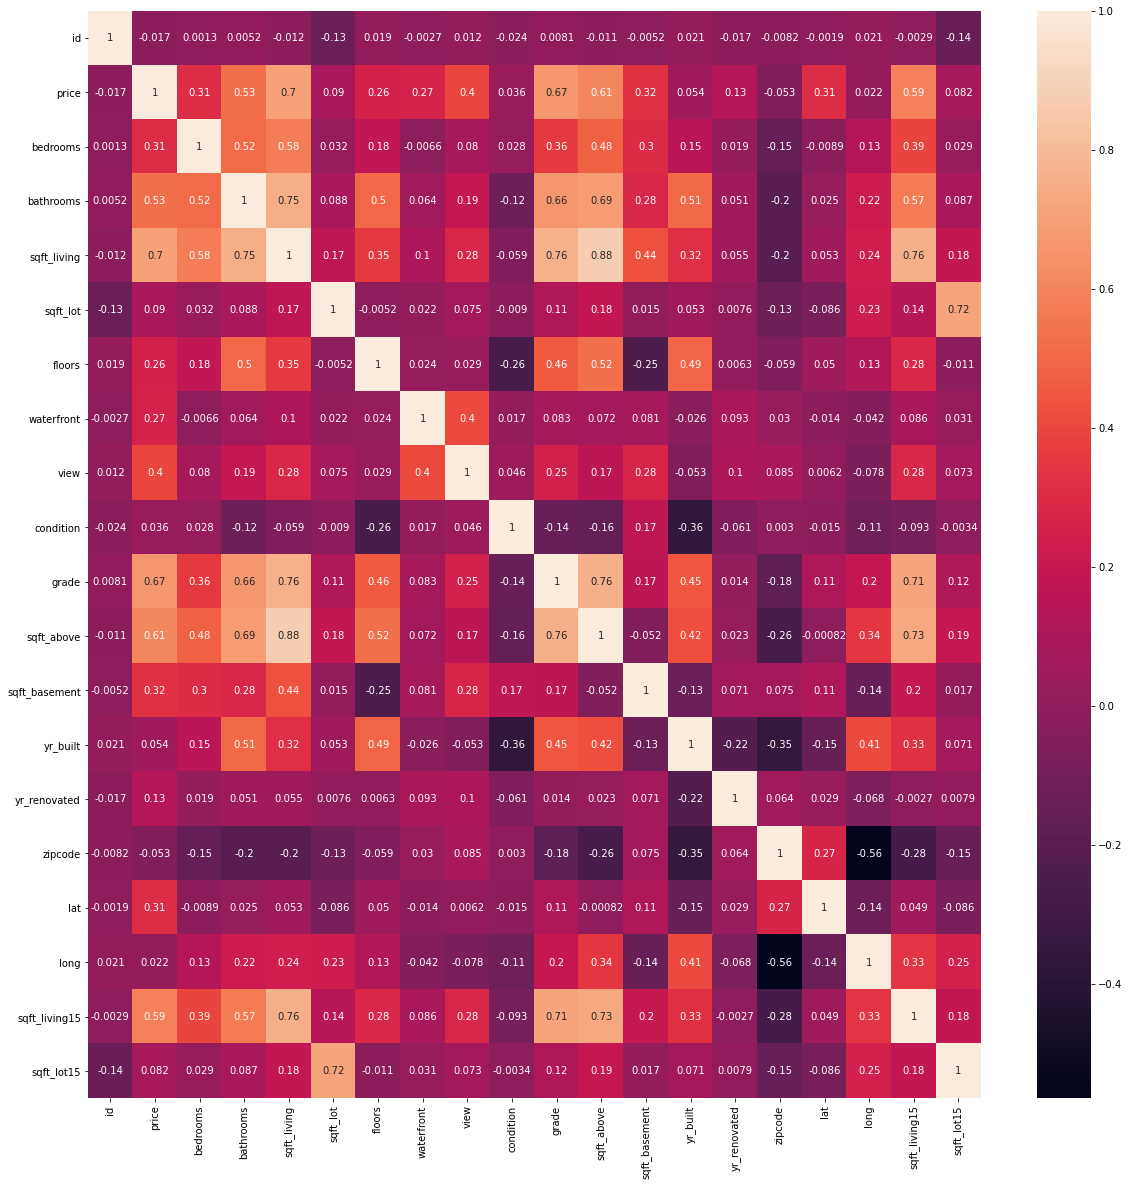

In [4]:
import seaborn as sns

Var_Corr = kc.corr()
plt.figure(figsize=(20,20))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [83]:
df = pd.read_csv (r'C:\Users\ghaza\OneDrive\Bureau\GoMyCode\kc_house_data.csv')
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
X= kc[["sqft_living15","sqft_living","sqft_above","sqft_lot"]]
y= kc.bathrooms

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
print ("X_train: ", X_train)
print ("y_train: ", y_train)
print("X_test: ", X_test)
print ("y_test: ", y_test) 

X_train:         sqft_living15  sqft_living  sqft_above  sqft_lot
6900            1590         2710        2710     14016
12350           3590         2780        1730     11904
4817            2580         3320        3320      5034
6495            3840         3560        3560     13981
4168            1700         1980        1980      7800
...              ...          ...         ...       ...
11660           1960         1200        1200     16000
2005            1280         1350        1350     10096
74              1940         1790        1090     50529
6834            1990         1560        1560      8968
13394           2270         2350        1570      9051

[17290 rows x 4 columns]
y_train:  6900     3.50
12350    2.50
4817     2.50
6495     2.50
4168     2.50
         ... 
11660    1.00
2005     1.00
74       1.75
6834     1.75
13394    2.50
Name: bathrooms, Length: 17290, dtype: float64
X_test:         sqft_living15  sqft_living  sqft_above  sqft_lot
8866            

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (17290, 4)
Test set: (4323, 4)


In [85]:
#Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [86]:

x=kc["sqft_living15"].values[:,np.newaxis]
y=kc["sqft_above"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)
model=LinearRegression()   
model.fit(x_train,y_train)  
predicted=model.predict(x_test) 

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 300340.90084942966
R squared 0.5621403305898285


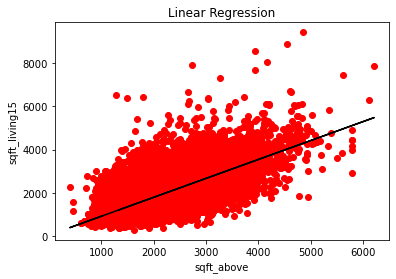

In [87]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("sqft_living15")
plt.xlabel("sqft_above")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [96]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics
x= kc[["sqft_living15", "sqft_living"]]
y= kc["sqft_above"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  147748.11034422394
R squared:  0.7846016357800962


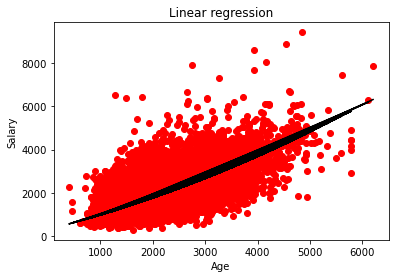

In [102]:
x= kc["sqft_living15"].values.reshape(-1,1)
y= kc["sqft_above"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("Salary")
plt.xlabel("Age")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 